<a href="https://colab.research.google.com/github/arvanda07/-preprocessing.ipynb/blob/main/Prediction_BMW_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics

In [283]:
dataset = pd.read_csv("Dataset_Prediksi_BMW.csv")
dataset.shape

(1000, 9)

In [284]:
dataset.head()

,model,year,price,engineSize,mileage,fuelType,tax,mpg,transmission
0,5 Series,2014,11200,2.0,67068,Diesel,125,57.6,1
1,6 Series,2018,27000,2.0,14827,Petrol,145,42.8,1
2,5 Series,2016,16000,3.0,62794,Diesel,160,51.4,1
3,1 Series,2017,12750,1.5,26676,Diesel,145,72.4,1
4,7 Series,2014,14500,3.0,39554,Diesel,160,50.4,1


In [285]:
dataset.describe()

,year,price,engineSize,mileage,tax,mpg,transmission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2017.056000,21870.522000,2.180900,24691.131000,130.090000,57.477100,1.431000
std,1.713418,10674.793238,0.547252,19967.542036,55.194096,30.590835,0.495464
min,2013.000000,6998.000000,0.000000,10.000000,0.000000,24.100000,1.000000
25%,2016.000000,14998.000000,2.000000,8663.750000,125.000000,47.900000,1.000000
50%,2017.000000,19000.000000,2.000000,20060.000000,145.000000,54.300000,1.000000
75%,2019.000000,25492.000000,3.000000,35500.000000,150.000000,62.800000,2.000000
max,2020.000000,84898.000000,4.400000,96213.000000,305.000000,470.800000,2.000000


In [286]:
data = dataset.dropna(axis = 0)
data.describe()

,year,price,engineSize,mileage,tax,mpg,transmission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2017.056000,21870.522000,2.180900,24691.131000,130.090000,57.477100,1.431000
std,1.713418,10674.793238,0.547252,19967.542036,55.194096,30.590835,0.495464
min,2013.000000,6998.000000,0.000000,10.000000,0.000000,24.100000,1.000000
25%,2016.000000,14998.000000,2.000000,8663.750000,125.000000,47.900000,1.000000
50%,2017.000000,19000.000000,2.000000,20060.000000,145.000000,54.300000,1.000000
75%,2019.000000,25492.000000,3.000000,35500.000000,150.000000,62.800000,2.000000
max,2020.000000,84898.000000,4.400000,96213.000000,305.000000,470.800000,2.000000


In [287]:
print (dataset.dtypes)

model            object
year              int64
price             int64
engineSize      float64
mileage           int64
fuelType         object
tax               int64
mpg             float64
transmission      int64
dtype: object


In [288]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((1000, 5), (1000,))

In [289]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state = 0)

In [290]:
y_test.shape

(250,)

In [291]:
print(x_train)

     year  mileage  tax   mpg  engineSize
253  2015    48867  145  54.3         2.0
667  2016    13085  145  55.4         2.0
85   2016    77482   20  68.9         2.0
969  2015    48444  200  41.5         2.0
75   2017    30865  145  72.4         1.5
..    ...      ...  ...   ...         ...
835  2019     6520  145  24.8         3.0
192  2017    47110    0  78.5         1.5
629  2016    19125  150  53.3         3.0
559  2020     2000  145  44.1         1.5
684  2014    54335   30  62.8         2.0

[750 rows x 5 columns]


In [292]:
print (x_test)

     year  mileage  tax    mpg  engineSize
993  2017    19307  145   64.2         2.0
859  2019      678  145   65.7         2.0
298  2016    15088  145   55.4         3.0
553  2017    24909  145   62.8         2.0
672  2018    24141  140  156.9         2.0
..    ...      ...  ...    ...         ...
462  2019     1251  145   42.8         1.5
356  2017    18435  125   53.3         1.5
2    2016    62794  160   51.4         3.0
478  2019     2472  145   48.7         2.0
695  2016    24000   30   65.7         2.0

[250 rows x 5 columns]


In [293]:
print (y_train)

253    17498
667    19998
85     12150
969    13498
75     11100
       ...  
835    53898
192    11498
629    18998
559    22000
684    11891
Name: price, Length: 750, dtype: int64


In [294]:
print (y_test)

993    17498
859    30900
298    18000
553    17695
672    25998
       ...  
462    21000
356    11990
2      16000
478    29000
695    13491
Name: price, Length: 250, dtype: int64


In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [296]:
print (x_train)

[[-1.2387466   1.23778197  0.27781485 -0.10114092 -0.34324934]
 [-0.6484925  -0.57124712  0.27781485 -0.06504728 -0.34324934]
 [-0.6484925   2.68446933 -1.97717582  0.37792    -0.34324934]
 ...
 [-0.6484925  -0.26588309  0.36801448 -0.13395331  1.4748086 ]
 [ 1.71252389 -1.131671    0.27781485 -0.43582731 -1.2522783 ]
 [-1.8290007   1.51422742 -1.79677657  0.17776441 -0.34324934]]


In [297]:
print (x_test)

[[-0.0582384  -0.25668172  0.27781485  0.22370176 -0.34324934]
 [ 1.12226979 -1.1985073   0.27781485  0.27292035 -0.34324934]
 [-0.6484925  -0.46998153  0.27781485 -0.06504728  1.4748086 ]
 ...
 [-0.6484925   1.94188873  0.54841373 -0.19629685  1.4748086 ]
 [ 1.12226979 -1.10780812  0.27781485 -0.28489031 -0.34324934]
 [-0.6484925  -0.01941792 -1.79677657  0.27292035 -0.34324934]]


In [298]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse
model = KNN_Reg(n_neighbors = 1)

# model Training:
model.fit(x_train, y_train)
test1 = model.score(x_test, y_test)

# Test Prediksi
test_predict = model.predict(x_test)
score = mse(test_predict, y_test)
print(' Mean Square Error: ', score, '\n', 'Accuracy: ', test1) 

 Mean Square Error:  34441129.14 
 Accuracy:  0.6132581085267351


In [299]:
def Elbow(K):
  #inisiasi List kosong
  test_MSE =[]

  #model data training untuk setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(x_train, y_train)
    temp = model.predict(x_test)
    temp = mse(temp, y_test)
    test_MSE.append(temp)
  
  return test_MSE

Text(0.5, 1.0, 'Elbow Curve for Test')

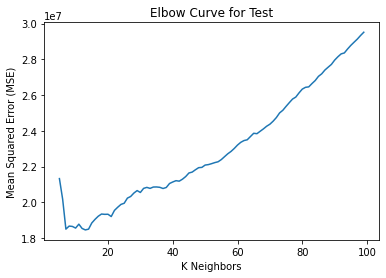

In [318]:
K = range(5, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [301]:
new_model = KNN_Reg(n_neighbors=7)

# Model Training
new_model.fit(x_train, y_train)
test2 = new_model.score(x_test, y_test)

# Prediksi test
print(' Akurasi Model Baru (%):', test2*100, '\n', 'Akurasi Model Lama (%):', test1*100, '\n Perbaikan (%):', (test2-test1)*100)

 Akurasi Model Baru (%): 79.21920029227451 
 Akurasi Model Lama (%): 61.32581085267351 
 Perbaikan (%): 17.893389439600995


Text(0.5, 1.0, 'Harga per Tahun')

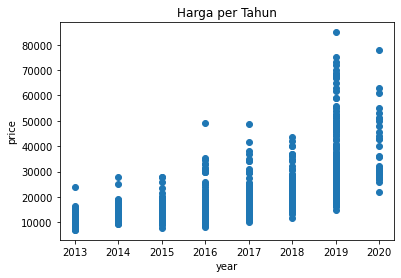

In [314]:
np.corrcoef(data['price'], data['year'])
plt.scatter(data['year'], data['price'])
plt.xlabel("year")
plt.ylabel("price")
plt.title("Harga per Tahun")

In [311]:
data_BMW_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_BMW_bekas)
prediction_new = new_model.predict(data_BMW_bekas)
print(' Hasil Prediksi harga BMW dengan Model Prediksi Lama: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n\n',
      'Hasil Prediksi harga BMW dengan Model Prediksi Baru: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga BMW dengan Model Prediksi Lama: £ [19750.] atau jika dirupiahkan yaitu: Rp [377.4225] Juta

 Hasil Prediksi harga BMW dengan Model Prediksi Baru: £ [15126.57142857] atau jika dirupiahkan yaitu: Rp [289.06878] Juta
